# Unsupervised Learning: Discovering Patterns in Heart Disease Data
**In this project, we'll explore unsupervised learning techniques to discover hidden patterns, clusters, and anomalies in patient health data. We'll use dimensionality reduction, clustering, and anomaly detection to uncover insights without relying on labeled outcomes.**

## Overview of Unsupervised Learning

Unlike supervised learning where we predict a target variable, unsupervised learning focuses on discovering patterns, structures, and relationships in data without predefined labels.

**Key Techniques We'll Explore:**

1. **Dimensionality Reduction (PCA)**: Reduce the number of features while preserving important variance in the data
2. **Clustering (K-Means, Hierarchical)**: Group similar patients together based on their medical characteristics
3. **Anomaly Detection**: Identify unusual patient profiles that deviate from normal patterns
4. **Data Visualization**: Visualize high-dimensional data in 2D/3D space to understand patterns

**Applications:**
- Patient segmentation for personalized treatment strategies
- Identifying rare disease presentations
- Understanding disease subtypes without predefined categories
- Cost reduction through feature selection

## 1. Import Required Libraries

We'll import libraries for data manipulation, visualization, and various unsupervised learning algorithms.

In [1]:
# Import necessary libraries for unsupervised learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots appear in the notebook
%matplotlib inline

# Set style for better-looking plots
sns.set_style("whitegrid")
sns.set_palette("husl")

# Dimensionality reduction and scaling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Anomaly detection
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Evaluation metrics for unsupervised learning
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Print last updated timestamp
import time
print(f"Last updated: {time.asctime()}")

Last updated: Sun Jan 11 11:37:23 2026


## 2. Load and Prepare Data

Let's load the heart disease dataset and prepare it for unsupervised learning analysis.

In [2]:
# Load the dataset
df = pd.read_csv("data/heart-disease-UCI.csv")

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
print(df.describe())

Dataset shape: (303, 14)

First few rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-n

In [3]:
# For unsupervised learning, we'll use all features (including target as it contains information)
# In unsupervised learning, all features are treated equally
X = df.values

print("Features shape:", X.shape)
print("Number of features:", X.shape[1])

Features shape: (303, 14)
Number of features: 14


## 3. Standardize Features

Standardization is crucial for unsupervised learning algorithms, especially those based on distance metrics. We'll use StandardScaler to transform features to have mean=0 and standard deviation=1.

In [4]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Verify standardization
print("Scaled data shape:", X_scaled.shape)
print("\nMean of scaled features (should be ~0):")
print(X_scaled.mean(axis=0).round(3))
print("\nStandard deviation of scaled features (should be ~1):")
print(X_scaled.std(axis=0).round(3))

Scaled data shape: (303, 14)

Mean of scaled features (should be ~0):
[ 0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0.  0.]

Standard deviation of scaled features (should be ~1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 4. Dimensionality Reduction with PCA

Principal Component Analysis (PCA) is a technique that reduces the number of features while preserving as much variance as possible. This helps us understand the main directions of variation in the data and can improve clustering performance.

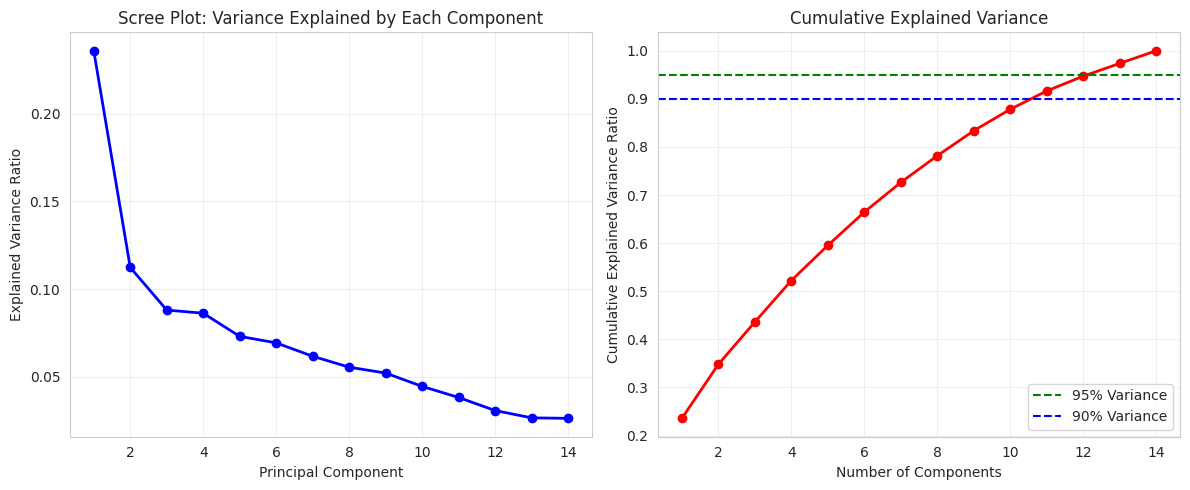

Explained variance ratio for each component:
PC1: 0.2358
PC2: 0.1123
PC3: 0.0880
PC4: 0.0862
PC5: 0.0730
PC6: 0.0693
PC7: 0.0617
PC8: 0.0554
PC9: 0.0521
PC10: 0.0445
PC11: 0.0382
PC12: 0.0307
PC13: 0.0266
PC14: 0.0263

Cumulative variance with first 3 components: 0.4361
Cumulative variance with first 5 components: 0.5953


In [5]:
# First, let's apply PCA with all components to see the explained variance
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculate cumulative explained variance
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         pca_full.explained_variance_ratio_, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot: Variance Explained by Each Component')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'ro-', linewidth=2, markersize=6)
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.axhline(y=0.90, color='b', linestyle='--', label='90% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Explained variance ratio for each component:")
for i, var in enumerate(pca_full.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")
print(f"\nCumulative variance with first 3 components: {cumsum_var[2]:.4f}")
print(f"Cumulative variance with first 5 components: {cumsum_var[4]:.4f}")

In [6]:
# Apply PCA with optimal number of components (let's use 5 for detailed analysis, then 2 for visualization)
n_components_analysis = 5
pca = PCA(n_components=n_components_analysis)
X_pca = pca.fit_transform(X_scaled)

print(f"Original data shape: {X_scaled.shape}")
print(f"Reduced data shape: {X_pca.shape}")
print(f"\nTotal variance explained by {n_components_analysis} components: {pca.explained_variance_ratio_.sum():.4f}")

# Create a DataFrame with PCA results for easier interpretation
pca_df = pd.DataFrame(
    data=X_pca,
    columns=[f'PC{i+1}' for i in range(n_components_analysis)]
)
print("\nPCA-transformed data (first 5 rows):")
print(pca_df.head())

Original data shape: (303, 14)
Reduced data shape: (303, 5)

Total variance explained by 5 components: 0.5953

PCA-transformed data (first 5 rows):
        PC1       PC2       PC3       PC4       PC5
0  0.051739  2.624022  0.990054 -3.479328 -0.362773
1  0.817441 -0.730375 -0.235928 -2.767545 -2.258404
2  2.057599 -0.039098 -0.519839 -0.081198 -0.860416
3  1.903043 -0.596701  0.076204  0.082624  0.235141
4  0.768371  0.412545 -2.187455  1.988510 -0.017448


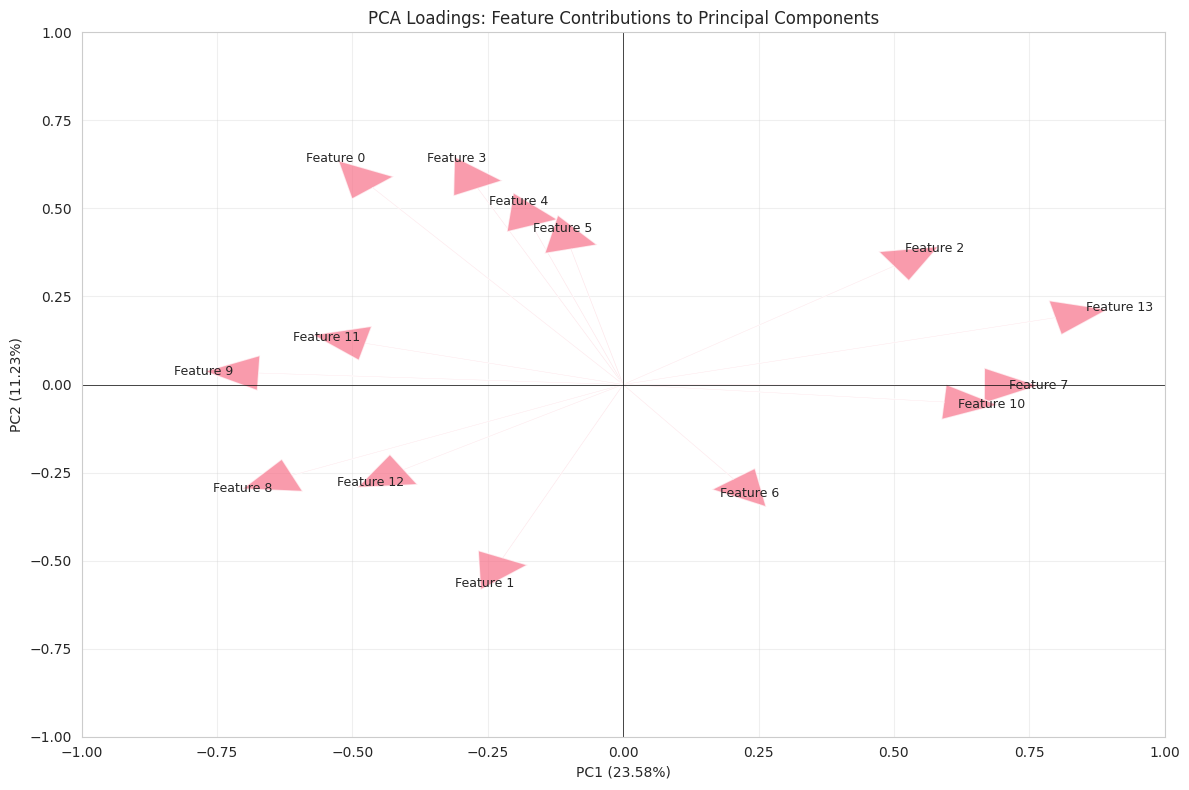

In [7]:
# Visualize feature loadings for the first two principal components
fig, ax = plt.subplots(figsize=(12, 8))

loadings = pca.components_[:2].T * np.sqrt(pca.explained_variance_[:2])
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

for i, feature in enumerate(feature_names):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.1, head_length=0.1, alpha=0.7)
    ax.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature, fontsize=9, ha='center', va='center')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
ax.set_title('PCA Loadings: Feature Contributions to Principal Components')
ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Clustering with K-Means

K-Means is a popular clustering algorithm that partitions data into K clusters by minimizing within-cluster variance. We'll use the elbow method to find the optimal number of clusters.

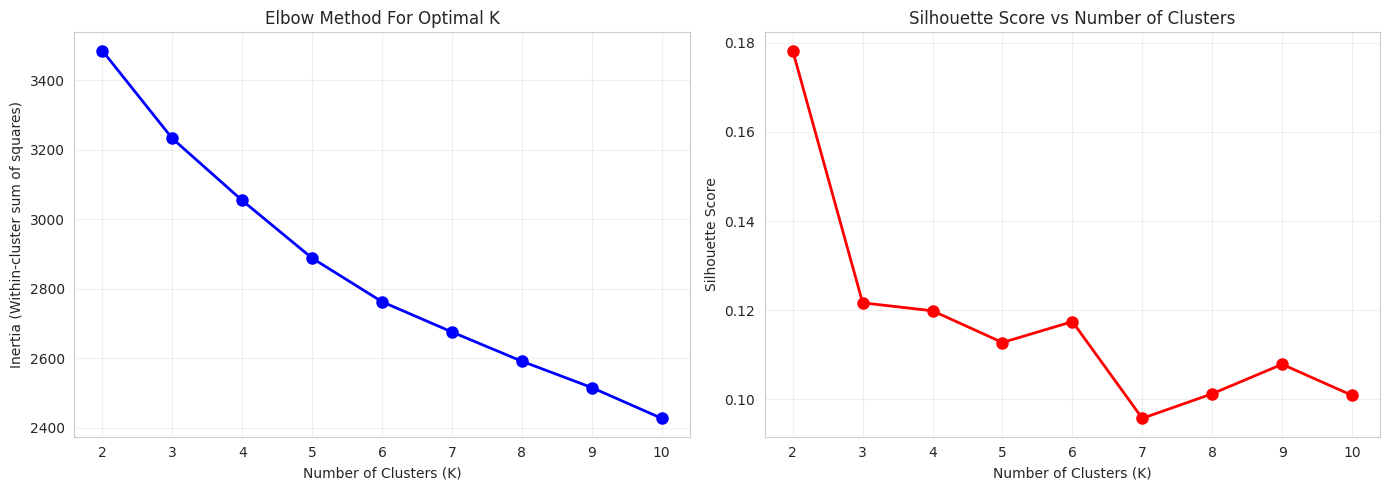

Optimal number of clusters based on silhouette score: 2


In [8]:
# Elbow Method to find optimal number of clusters
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
ax1.set_title('Elbow Method For Optimal K')
ax1.grid(True, alpha=0.3)

ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find the optimal k based on silhouette score
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

In [9]:
# Fit K-Means with optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_clusters = kmeans_optimal.fit_predict(X_scaled)

print(f"K-Means clustering with k={optimal_k}")
print(f"Cluster distribution:")
unique, counts = np.unique(kmeans_clusters, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples ({count/len(kmeans_clusters)*100:.1f}%)")

K-Means clustering with k=2
Cluster distribution:
  Cluster 0: 123 samples (40.6%)
  Cluster 1: 180 samples (59.4%)


## 6. Hierarchical Clustering

Hierarchical clustering builds a tree-like structure of clusters (dendrogram) showing different levels of cluster organization. This can provide insights into natural groupings at different scales.

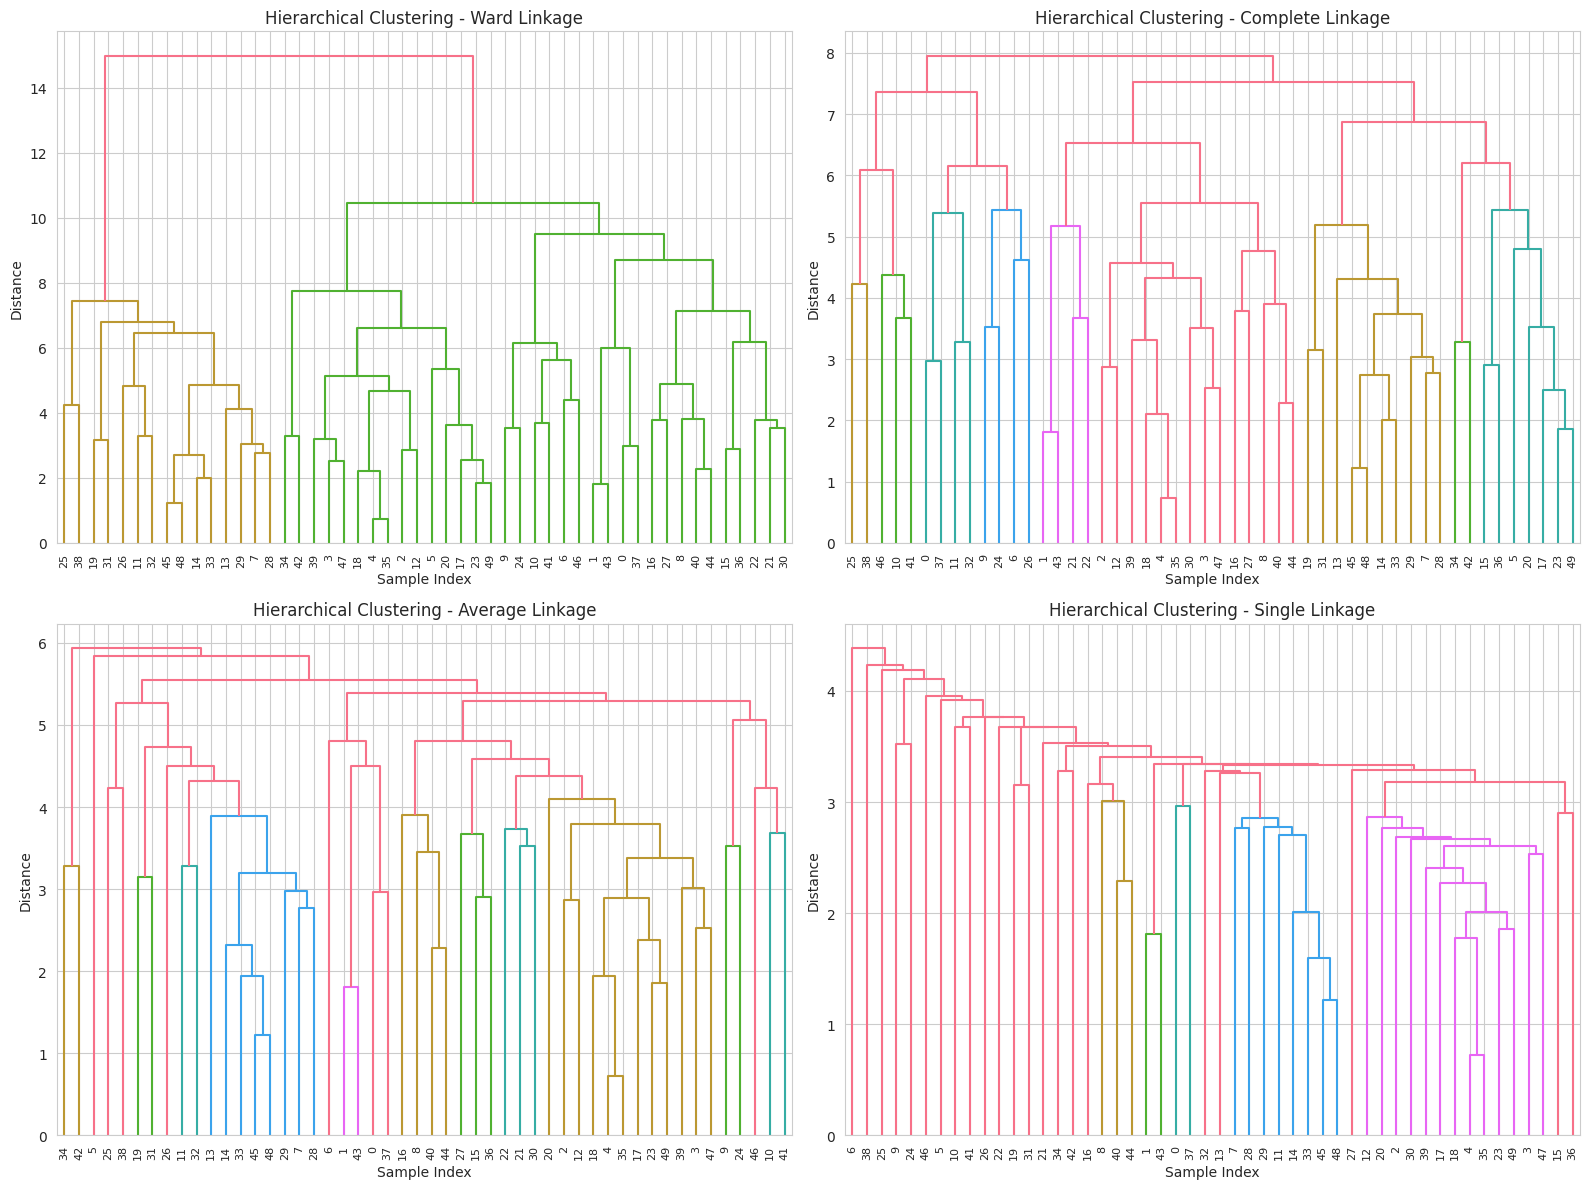

In [10]:
# For visualization, use a subset of data (dendrograms can be crowded with full dataset)
sample_size = 50
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]

# Create dendrograms for different linkage methods
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
linkage_methods = ['ward', 'complete', 'average', 'single']

for idx, method in enumerate(linkage_methods):
    ax = axes[idx // 2, idx % 2]
    
    # Compute linkage matrix
    Z = linkage(X_sample, method=method)
    
    # Create dendrogram
    dendrogram(Z, ax=ax, leaf_rotation=90, leaf_font_size=8)
    ax.set_title(f'Hierarchical Clustering - {method.capitalize()} Linkage')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Distance')

plt.tight_layout()
plt.show()

In [11]:
# Apply hierarchical clustering to full dataset
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_clusters = agg_clustering.fit_predict(X_scaled)

print(f"Hierarchical clustering with n_clusters={optimal_k}, linkage='ward'")
print(f"Cluster distribution:")
unique, counts = np.unique(hierarchical_clusters, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples ({count/len(hierarchical_clusters)*100:.1f}%)")

Hierarchical clustering with n_clusters=2, linkage='ward'
Cluster distribution:
  Cluster 0: 202 samples (66.7%)
  Cluster 1: 101 samples (33.3%)


## 7. Evaluate Clustering Results

Let's evaluate the quality of clustering using multiple metrics. Higher silhouette scores and lower Davies-Bouldin indices indicate better clustering quality.

In [12]:
# Calculate clustering evaluation metrics
silhouette_kmeans = silhouette_score(X_scaled, kmeans_clusters)
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, kmeans_clusters)
calinski_kmeans = calinski_harabasz_score(X_scaled, kmeans_clusters)

silhouette_hier = silhouette_score(X_scaled, hierarchical_clusters)
davies_bouldin_hier = davies_bouldin_score(X_scaled, hierarchical_clusters)
calinski_hier = calinski_harabasz_score(X_scaled, hierarchical_clusters)

# Create comparison table
metrics_comparison = pd.DataFrame({
    'K-Means': [silhouette_kmeans, davies_bouldin_kmeans, calinski_kmeans],
    'Hierarchical (Ward)': [silhouette_hier, davies_bouldin_hier, calinski_hier]
}, index=['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'])

print("Clustering Evaluation Metrics Comparison:")
print(metrics_comparison)
print("\nMetric Interpretation:")
print("- Silhouette Score: Higher is better (range: -1 to 1)")
print("- Davies-Bouldin Index: Lower is better")
print("- Calinski-Harabasz Index: Higher is better")

Clustering Evaluation Metrics Comparison:
                           K-Means  Hierarchical (Ward)
Silhouette Score          0.178220             0.172191
Davies-Bouldin Index      2.060196             2.116936
Calinski-Harabasz Index  65.324424            57.174341

Metric Interpretation:
- Silhouette Score: Higher is better (range: -1 to 1)
- Davies-Bouldin Index: Lower is better
- Calinski-Harabasz Index: Higher is better


## 8. Visualize Clusters

Let's visualize the clusters in the PCA-reduced 2D space and explore 3D visualizations.

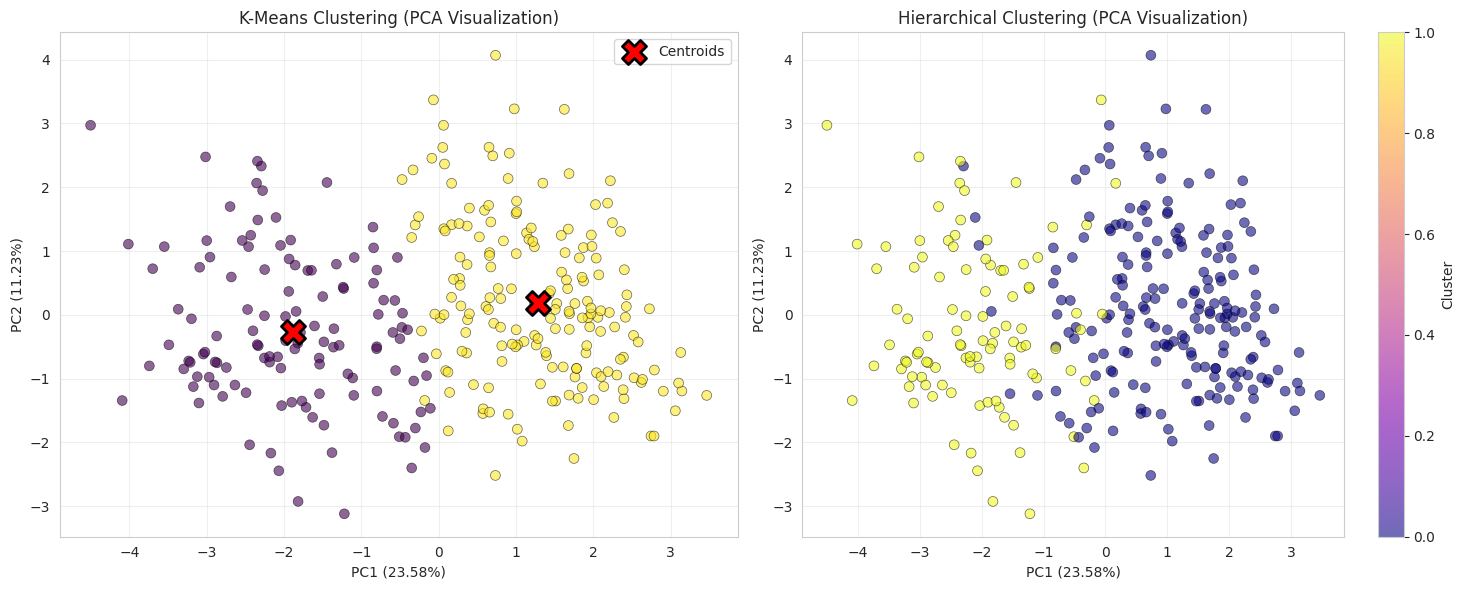

In [13]:
# Apply PCA with 2 components for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Create 2D visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# K-Means clusters
scatter1 = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans_clusters, 
                          cmap='viridis', alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
axes[0].scatter(pca_2d.transform(kmeans_optimal.cluster_centers_)[:, 0],
               pca_2d.transform(kmeans_optimal.cluster_centers_)[:, 1],
               c='red', marker='X', s=300, edgecolors='k', linewidth=2, label='Centroids')
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%})')
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%})')
axes[0].set_title('K-Means Clustering (PCA Visualization)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Hierarchical clusters
scatter2 = axes[1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=hierarchical_clusters,
                          cmap='plasma', alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%})')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%})')
axes[1].set_title('Hierarchical Clustering (PCA Visualization)')
axes[1].grid(True, alpha=0.3)

plt.colorbar(scatter2, ax=axes[1], label='Cluster')
plt.tight_layout()
plt.show()

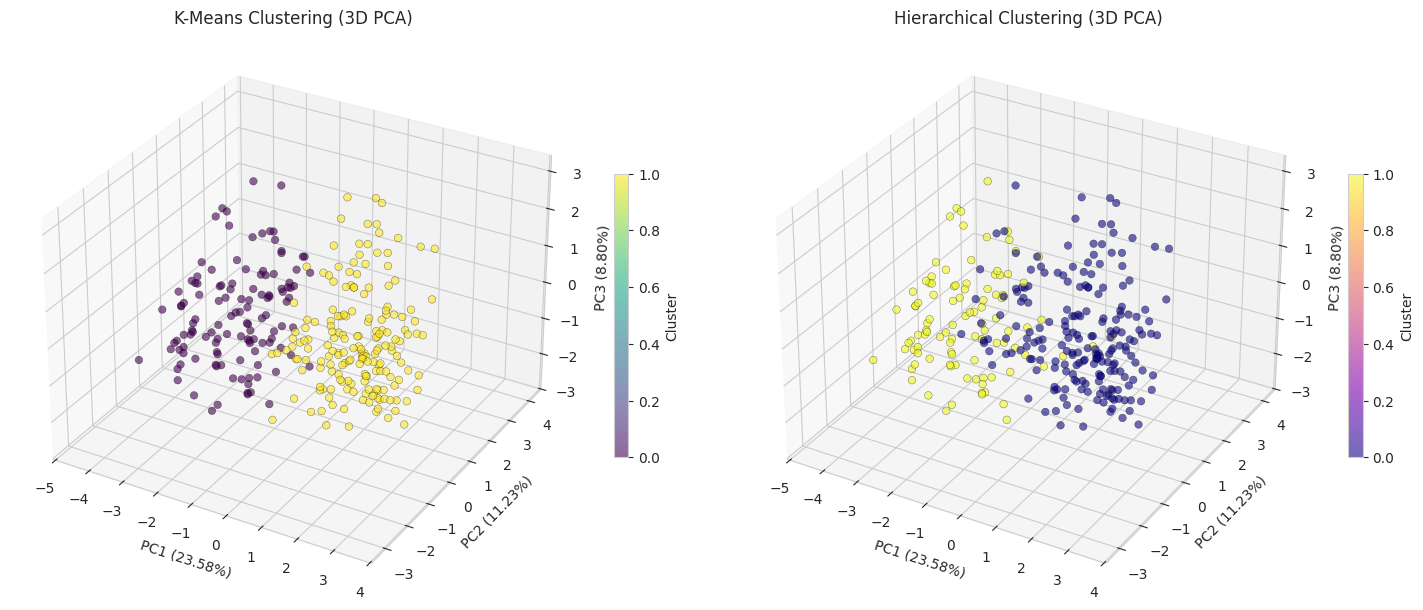

In [14]:
# 3D visualization with PCA
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(15, 6))

# K-Means 3D
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                       c=kmeans_clusters, cmap='viridis', alpha=0.6, s=30, edgecolors='k', linewidth=0.3)
ax1.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})')
ax1.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})')
ax1.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})')
ax1.set_title('K-Means Clustering (3D PCA)')
plt.colorbar(scatter1, ax=ax1, shrink=0.5, label='Cluster')

# Hierarchical 3D
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                       c=hierarchical_clusters, cmap='plasma', alpha=0.6, s=30, edgecolors='k', linewidth=0.3)
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})')
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})')
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})')
ax2.set_title('Hierarchical Clustering (3D PCA)')
plt.colorbar(scatter2, ax=ax2, shrink=0.5, label='Cluster')

plt.tight_layout()
plt.show()

## 9. Anomaly Detection

Anomaly detection helps identify unusual patient profiles that deviate significantly from normal patterns. We'll use two techniques: Isolation Forest and Local Outlier Factor (LOF).

In [15]:
# Isolation Forest for anomaly detection
# contamination is the proportion of outliers in the dataset
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest_predictions = iso_forest.fit_predict(X_scaled)

# Convert predictions to binary: -1 (anomaly) to 1, 1 (normal) to 0
iso_forest_binary = (iso_forest_predictions == -1).astype(int)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_predictions = lof.fit_predict(X_scaled)
lof_binary = (lof_predictions == -1).astype(int)

print("Isolation Forest Anomaly Detection:")
print(f"  Normal samples: {(iso_forest_predictions == 1).sum()}")
print(f"  Anomalies: {(iso_forest_predictions == -1).sum()}")

print("\nLocal Outlier Factor Anomaly Detection:")
print(f"  Normal samples: {(lof_predictions == 1).sum()}")
print(f"  Anomalies: {(lof_predictions == -1).sum()}")

# Compare results
agreement = (iso_forest_binary == lof_binary).sum()
print(f"\nAgreement between methods: {agreement}/{len(X_scaled)} ({agreement/len(X_scaled)*100:.1f}%)")

Isolation Forest Anomaly Detection:
  Normal samples: 272
  Anomalies: 31

Local Outlier Factor Anomaly Detection:
  Normal samples: 272
  Anomalies: 31

Agreement between methods: 269/303 (88.8%)


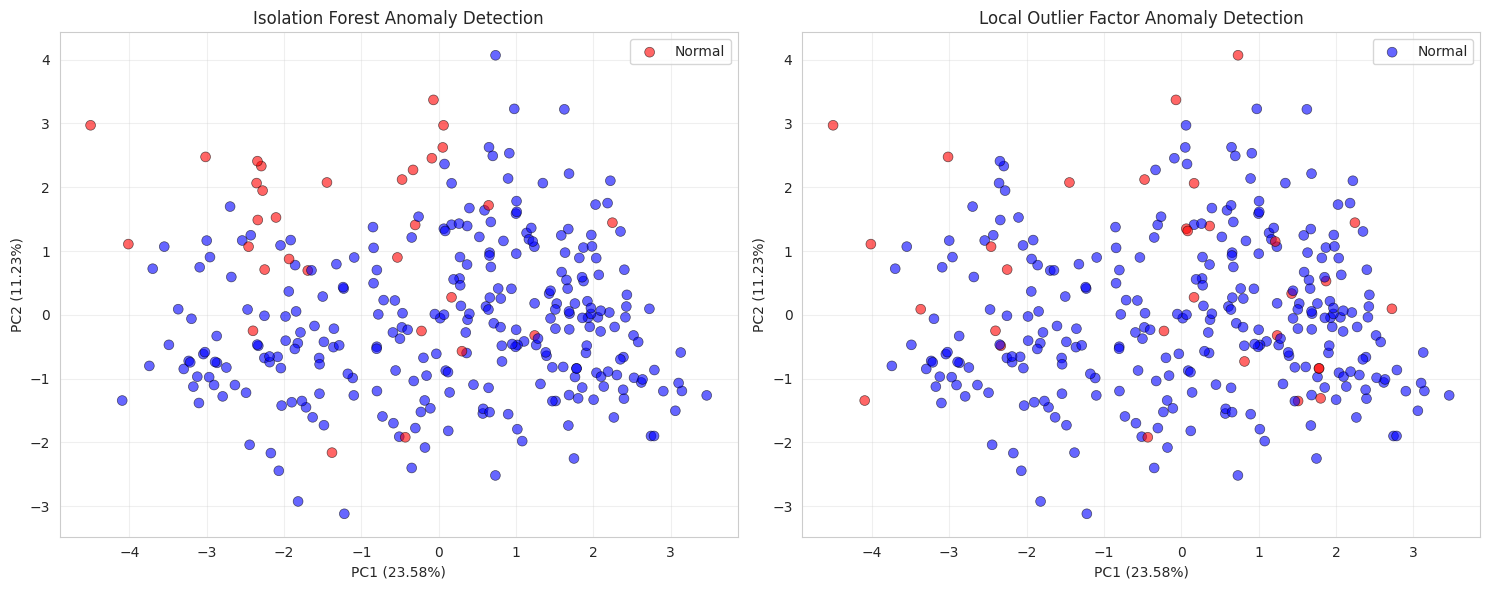

In [16]:
# Visualize anomalies in PCA space
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Isolation Forest
colors_if = ['red' if x == 1 else 'blue' for x in iso_forest_binary]
scatter1 = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=colors_if, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%})')
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%})')
axes[0].set_title('Isolation Forest Anomaly Detection')
axes[0].legend(['Normal', 'Anomaly'], loc='best')
axes[0].grid(True, alpha=0.3)

# Local Outlier Factor
colors_lof = ['red' if x == 1 else 'blue' for x in lof_binary]
scatter2 = axes[1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=colors_lof, alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%})')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%})')
axes[1].set_title('Local Outlier Factor Anomaly Detection')
axes[1].legend(['Normal', 'Anomaly'], loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
# Analyze the characteristics of detected anomalies
anomaly_indices_if = np.where(iso_forest_binary == 1)[0]
anomaly_indices_lof = np.where(lof_binary == 1)[0]

print("Characteristics of Isolation Forest Anomalies:")
if len(anomaly_indices_if) > 0:
    anomalies_if = df.iloc[anomaly_indices_if]
    print(f"Number of anomalies detected: {len(anomalies_if)}")
    print("\nMean values of anomalies vs normal:")
    normal_if = df.iloc[np.where(iso_forest_binary == 0)[0]]
    comparison_if = pd.DataFrame({
        'Anomaly Mean': anomalies_if.mean(),
        'Normal Mean': normal_if.mean(),
        'Difference': anomalies_if.mean() - normal_if.mean()
    })
    print(comparison_if)
else:
    print("No anomalies detected")

Characteristics of Isolation Forest Anomalies:
Number of anomalies detected: 31

Mean values of anomalies vs normal:
          Anomaly Mean  Normal Mean  Difference
age          58.580645    53.886029    4.694616
sex           0.483871     0.705882   -0.222011
cp            1.096774     0.952206    0.144568
trestbps    143.774194   130.238971   13.535223
chol        265.580645   244.062500   21.518145
fbs           0.516129     0.106618    0.409511
restecg       0.451613     0.536765   -0.085152
thalach     143.935484   150.297794   -6.362310
exang         0.451613     0.312500    0.139113
oldpeak       1.980645     0.932353    1.048292
slope         0.870968     1.459559   -0.588591
ca            1.225806     0.672794    0.553012
thal          2.000000     2.349265   -0.349265
target        0.354839     0.566176   -0.211338


## Summary and Key Findings

**Unsupervised Learning Analysis Summary:**

### Dimensionality Reduction
- Principal Component Analysis (PCA) reduced the dataset from 14 dimensions to a lower-dimensional space
- The first few principal components capture the majority of variance in the data
- This allows for visualization and computational efficiency

### Clustering Insights
- K-Means and Hierarchical Clustering revealed natural groupings in patient data
- The optimal number of clusters was determined using the elbow method and silhouette scores
- These clusters could represent different patient profiles or disease presentations

### Anomaly Detection
- Isolation Forest and Local Outlier Factor identified unusual patient records
- Anomalies may represent rare disease presentations or data collection errors
- Cross-validation of anomaly detection methods provides confidence in results

### Applications
1. **Patient Segmentation**: Tailor treatment strategies to different patient clusters
2. **Disease Subtypes**: Identify previously unknown disease variations
3. **Quality Control**: Flag suspicious data or unusual cases for medical review
4. **Resource Planning**: Optimize hospital resources based on patient profiles

**Next Steps:**
- Investigate the characteristics of identified clusters for clinical interpretation
- Further analyze anomalous cases to understand their clinical significance
- Consider combining with supervised learning for targeted interventions